# BAYESIAN PREDICTIVE MAINTENANCE FOR FLEET VEHICLE

## OPTIONAL

In [2]:
import pandas as pd
import glob
import os

def merge_batches(pattern, output_file, parse_dates=None):
    """
    Merge all batch CSVs matching pattern into one combined CSV.

    pattern: str → glob pattern (like '../fctSignal_batch*.csv')
    output_file: str → output filename (like 'fctSignal_all.csv')
    parse_dates: list[str] → columns to parse as datetime (optional)
    """
    files = sorted(glob.glob(pattern))
    if not files:
        print(f"❌ No files found for pattern: {pattern}")
        return

    print(f"🌀 Merging {len(files)} files → {output_file}")

    # Initialize write mode
    header_written = False
    for i, f in enumerate(files):
        chunk = pd.read_csv(f, parse_dates=parse_dates)
        chunk.to_csv(output_file, mode='a', index=False, header=not header_written)
        header_written = True
        print(f"✅ [{i+1}/{len(files)}] Merged {os.path.basename(f)} ({len(chunk)} rows)")

    print(f"\n🎯 Done → {output_file}")
    df = pd.read_csv(output_file, nrows=5)  # sanity check
    print(f"📊 Combined file preview:")
    display(df.head())
    return output_file


# ---- Run for Motor ----
merge_batches(
    pattern="fctMotor_batch*.csv",
    output_file="fctMotor_50VIN.csv",
    parse_dates=["timestamp"]
)

# ---- Run for BrakePad ----
merge_batches(
    pattern="fctBrakePads_batch*.csv",
    output_file="fctBrakePads_50VIN.csv",
    parse_dates=["timestamp"]
)

# ---- Run for Battery ----
merge_batches(
    pattern="fctBattery_batch*.csv",
    output_file="fctBattery_50VIN.csv",
    parse_dates=["timestamp"]
)

🌀 Merging 2 files → fctMotor_50VIN.csv
✅ [1/2] Merged fctMotor_batch1.csv (284207 rows)
✅ [2/2] Merged fctMotor_batch21.csv (414038 rows)

🎯 Done → fctMotor_50VIN.csv
📊 Combined file preview:


,vin,motorId,motorPosition,timestamp,odometer,speedRpm,torqueNm,powerKw,efficiency,statorTemp,...,phaseVoltageA,phaseVoltageB,phaseVoltageC,powerFactor,vibrationRms,bearingHealth,insulationResistance,efficiencyDegradation,failureSeverity,failureFlag
0,DCA25CHN000001,DCA25CHN000001_M1,Front,2025-04-03 19:00:00,10375.161328,2079.864154,189.440996,41.309476,92.503944,95.288735,...,97.403690,95.294240,112.970918,0.911130,2.269,96.660736,523.360176,0.524,0.0,0
1,DCA25CHN000001,DCA25CHN000001_M1,Front,2025-04-03 19:00:30,10376.080427,2259.117044,211.054318,49.901179,92.320529,99.613483,...,110.125167,105.273233,120.217921,0.910751,2.483,96.659970,574.816572,0.552,0.0,0
2,DCA25CHN000001,DCA25CHN000001_M1,Front,2025-04-03 19:01:00,10376.999526,1303.956903,147.602575,20.161530,93.749873,99.228422,...,72.412457,55.336888,65.412791,0.913609,2.903,96.659204,446.395919,0.338,0.0,0
3,DCA25CHN000001,DCA25CHN000001_M1,Front,2025-04-03 19:01:30,10377.918624,3101.546426,147.864304,48.042105,93.004280,92.054416,...,158.896076,152.812028,163.811921,0.912120,2.374,96.658438,517.512599,0.449,0.0,0
4,DCA25CHN000001,DCA25CHN000001_M1,Front,2025-04-03 19:02:00,10378.837723,1526.516086,132.263625,21.155093,93.201911,102.177370,...,74.187759,84.166735,78.948577,0.912519,3.475,96.657672,492.056289,0.420,0.0,0


🌀 Merging 2 files → fctBrakePads_50VIN.csv
✅ [1/2] Merged fctBrakePads_batch1.csv (1136828 rows)
✅ [2/2] Merged fctBrakePads_batch21.csv (1656152 rows)

🎯 Done → fctBrakePads_50VIN.csv
📊 Combined file preview:


,vin,wheelPosition,timestamp,padThicknessMm,padWearRate,padTemperature,rotorThicknessMm,rotorTemperature,rotorRunout,frictionCoefficient,brakeForce,brakePressure,padRulKm,rotorRulKm,fadeRisk,wearStatus,failureFlag
0,DCA25CHN000001,FL,2025-04-03 19:00:00,8.936099,0.000782,73.252924,29.171532,78.859943,0.038054,0.402007,452.260775,9.045216,8810.041201,29641.116998,0.280803,NORMAL,0
1,DCA25CHN000001,FR,2025-04-03 19:00:00,8.936099,0.000782,73.252924,29.171532,78.859943,0.038054,0.402007,452.260775,9.045216,9046.152548,29611.031312,0.280803,NORMAL,0
2,DCA25CHN000001,RL,2025-04-03 19:00:00,8.936099,0.000782,73.252924,29.171532,78.859943,0.038054,0.402007,452.260775,9.045216,9094.030358,29269.432349,0.280803,NORMAL,0
3,DCA25CHN000001,RR,2025-04-03 19:00:00,8.936099,0.000782,73.252924,29.171532,78.859943,0.038054,0.402007,452.260775,9.045216,9104.849112,28760.024872,0.280803,NORMAL,0
4,DCA25CHN000001,FL,2025-04-03 19:00:30,8.935827,0.000776,70.167647,29.625945,79.164731,0.060515,0.427097,558.437672,11.168753,8944.920562,29553.486063,0.268976,NORMAL,0


🌀 Merging 2 files → fctBattery_50VIN.csv
✅ [1/2] Merged fctBattery_batch1.csv (284207 rows)
✅ [2/2] Merged fctBattery_batch21.csv (414038 rows)

🎯 Done → fctBattery_50VIN.csv
📊 Combined file preview:


,vin,timestamp,soc,soh,totalVoltage,totalCurrent,power,avgCellVoltage,minCellVoltage,maxCellVoltage,...,capacityFade,powerFade,calendarAgingFactor,cycleAgingFactor,thermalRunawayRisk,imbalanceRisk,degradationRisk,cycleCount,energyThroughput,failureFlag
0,DCA25CHN000001,2025-04-03 19:00:00,82.049904,98.0471,306.409981,-115.059721,41.309476,3.529865,3.479865,3.579865,...,0.00003,0.092746,0.417408,0.0,0.019343,0.847494,0.940270,0,0.0,0
1,DCA25CHN000001,2025-04-03 19:00:30,81.759752,98.0471,306.351950,-72.964113,49.901179,3.147570,3.097570,3.197570,...,0.00003,0.162654,0.417408,0.0,0.071054,0.670175,0.832859,0,0.0,0
2,DCA25CHN000001,2025-04-03 19:01:00,81.469600,98.0471,306.293920,97.815954,20.161530,3.176135,3.126135,3.226135,...,0.00003,0.913136,0.417408,0.0,0.113436,0.717914,1.000000,0,0.0,0
3,DCA25CHN000001,2025-04-03 19:01:30,81.179448,98.0471,306.235890,-2.531338,48.042105,3.687065,3.637065,3.737065,...,0.00003,0.384767,0.417408,0.0,0.119178,0.468050,0.852847,0,0.0,0
4,DCA25CHN000001,2025-04-03 19:02:00,80.889296,98.0471,306.177859,25.542974,21.155093,3.079090,3.029090,3.129090,...,0.00003,0.625300,0.417408,0.0,0.168334,0.507663,1.000000,0,0.0,0


'fctBattery_50VIN.csv'

In [8]:
import pandas as pd
import os

# ================================================================
# ⚡ Step 1: Convert CSVs → Parquet (one-time setup)
# ================================================================
csv_to_parquet = {
    "battery": "fctBattery_50VIN.csv",
    "motor": "fctMotor_50VIN.csv",
    "brakepad": "fctBrakePads_50VIN.csv"
}

for name, csv_file in csv_to_parquet.items():
    parquet_file = csv_file.replace(".csv", ".parquet")
    
    if not os.path.exists(parquet_file):
        print(f"⏳ Converting {csv_file} → {parquet_file} ...")
        df = pd.read_csv(csv_file, parse_dates=["timestamp"])
        df.to_parquet(parquet_file, index=False, compression="snappy")
        print(f"✅ Saved {parquet_file} ({df.shape[0]} rows)")
    else:
        print(f"🟢 Parquet already exists for {name}")

⏳ Converting fctBattery_50VIN.csv → fctBattery_50VIN.parquet ...
✅ Saved fctBattery_50VIN.parquet (698245 rows)
⏳ Converting fctMotor_50VIN.csv → fctMotor_50VIN.parquet ...
✅ Saved fctMotor_50VIN.parquet (698245 rows)
⏳ Converting fctBrakePads_50VIN.csv → fctBrakePads_50VIN.parquet ...
✅ Saved fctBrakePads_50VIN.parquet (2792980 rows)


## INITIAL SETUP

In [80]:
# 1. Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files\mingw-w64\bin"
import arviz as az
import pymc as pm

# Plot style
plt.style.use("default")
sns.set_theme()

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', None)

In [37]:
# ================================================================
# ⚡ Step 2: Load Parquet Files for Fast Access
# ================================================================
battery = pd.read_parquet("fctBattery_50VIN.parquet")
print(f"🔋 Battery: {battery.shape}")

motor = pd.read_parquet("fctMotor_50VIN.parquet")
print(f"⚙️ Motor:   {motor.shape}")

brakepad = pd.read_parquet("fctBrakePads_50VIN.parquet")
print(f"🛞 BrakePad:{brakepad.shape}")

# (optional) check a preview
battery.head()

🔋 Battery: (698245, 29)
⚙️ Motor:   (698245, 26)
🛞 BrakePad:(2792980, 17)


,vin,timestamp,soc,soh,totalVoltage,totalCurrent,power,avgCellVoltage,minCellVoltage,maxCellVoltage,cellVoltageDelta,avgCellTemp,minCellTemp,maxCellTemp,cellTempDelta,coolantInletTemp,coolantOutletTemp,coolantFlowRate,ambientTemperature,capacityFade,powerFade,calendarAgingFactor,cycleAgingFactor,thermalRunawayRisk,imbalanceRisk,degradationRisk,cycleCount,energyThroughput,failureFlag
0,DCA25CHN000001,2025-04-03 19:00:00,82.049904,98.0471,306.409981,-115.059721,41.309476,3.529865,3.479865,3.579865,0.1,32.095609,30.095609,34.095609,4.0,28.629171,35.010035,4.682973,27.751068,0.00003,0.092746,0.417408,0.0,0.019343,0.847494,0.940270,0,0.0,0
1,DCA25CHN000001,2025-04-03 19:00:30,81.759752,98.0471,306.351950,-72.964113,49.901179,3.147570,3.097570,3.197570,0.1,34.421759,32.421759,36.421759,4.0,30.281380,36.328579,7.170552,30.830159,0.00003,0.162654,0.417408,0.0,0.071054,0.670175,0.832859,0,0.0,0
2,DCA25CHN000001,2025-04-03 19:01:00,81.469600,98.0471,306.293920,97.815954,20.161530,3.176135,3.126135,3.226135,0.1,32.327918,30.327918,34.327918,4.0,26.912780,34.130247,3.330943,36.333267,0.00003,0.913136,0.417408,0.0,0.113436,0.717914,1.000000,0,0.0,0
3,DCA25CHN000001,2025-04-03 19:01:30,81.179448,98.0471,306.235890,-2.531338,48.042105,3.687065,3.637065,3.737065,0.1,40.714114,38.714114,42.714114,4.0,37.234168,43.075076,5.982045,28.564563,0.00003,0.384767,0.417408,0.0,0.119178,0.468050,0.852847,0,0.0,0
4,DCA25CHN000001,2025-04-03 19:02:00,80.889296,98.0471,306.177859,25.542974,21.155093,3.079090,3.029090,3.129090,0.1,35.874165,33.874165,37.874165,4.0,30.588278,37.889528,3.532054,35.378428,0.00003,0.625300,0.417408,0.0,0.168334,0.507663,1.000000,0,0.0,0


In [38]:
# Clean datasets by dropping unreliable columns

# Battery
battery = battery.drop(columns=[
    'degradationRisk', 'imbalanceRisk', 'cycleAgingFactor',
    'thermalRunawayRisk', 'calendarAgingFactor',  # synthetic risks
    'powerFade'
], errors='ignore')

# BrakePad
brakepad = brakepad.drop(columns=[
    'padRulKm', 'rotorRulKm', 'fadeRisk'
], errors='ignore')

# Motor
motor = motor.drop(columns=[
    'efficiencyDegradation'
], errors='ignore')

print("Battery cols:", battery.columns)
print("BrakePad cols:", brakepad.columns)
print("Motor cols:", motor.columns)

Battery cols: Index(['vin', 'timestamp', 'soc', 'soh', 'totalVoltage', 'totalCurrent', 'power', 'avgCellVoltage', 'minCellVoltage', 'maxCellVoltage', 'cellVoltageDelta', 'avgCellTemp', 'minCellTemp', 'maxCellTemp', 'cellTempDelta', 'coolantInletTemp', 'coolantOutletTemp', 'coolantFlowRate', 'ambientTemperature', 'capacityFade', 'cycleCount', 'energyThroughput', 'failureFlag'], dtype='object')
BrakePad cols: Index(['vin', 'wheelPosition', 'timestamp', 'padThicknessMm', 'padWearRate', 'padTemperature', 'rotorThicknessMm', 'rotorTemperature', 'rotorRunout', 'frictionCoefficient', 'brakeForce', 'brakePressure', 'wearStatus', 'failureFlag'], dtype='object')
Motor cols: Index(['vin', 'motorId', 'motorPosition', 'timestamp', 'odometer', 'speedRpm', 'torqueNm', 'powerKw', 'efficiency', 'statorTemp', 'rotorTemp', 'bearingTemp', 'coolantTemp', 'phaseCurrentA', 'phaseCurrentB', 'phaseCurrentC', 'phaseVoltageA', 'phaseVoltageB', 'phaseVoltageC', 'powerFactor', 'vibrationRms', 'bearingHealth', 'ins

In [39]:
import pandas as pd
import numpy as np

# ================================================================
# 1️⃣ Clean datasets (drop redundant / synthetic columns)
# ================================================================
cols_to_drop = [
    "failureSeverity", "wearStatus", "degradationRisk", "fadeRisk",
    "thermalRunawayRisk", "imbalanceRisk", "powerFade", "capacityFade",
    "calendarAgingFactor", "cycleAgingFactor", "failureStatus"
]

for df_name, df in zip(["battery", "motor", "brakepad"], [battery, motor, brakepad]):
    existing_cols = [c for c in cols_to_drop if c in df.columns]
    if existing_cols:
        df.drop(columns=existing_cols, inplace=True)
        print(f"🧹 Cleaned {df_name}: dropped {len(existing_cols)} redundant cols")

# ================================================================
# 2️⃣ Ensure VIN column exists as column (not index)
# ================================================================
for df_name, df in zip(["battery", "motor", "brakepad"], [battery, motor, brakepad]):
    if "vin" not in df.columns:
        if df.index.name == "vin":
            df.reset_index(inplace=True)
        else:
            # try to recover vin from parquet/csv index if it was saved as such
            df.reset_index(inplace=True)
    print(f"✅ Verified VIN for {df_name}: {'vin' in df.columns}")

# ================================================================
# 3️⃣ Use simulation failure flags directly
# ================================================================
for df in [battery, motor, brakepad]:
    df["failure"] = df.get("failureFlag", 0).astype(np.int8)

# ================================================================
# 4️⃣ Vectorized future failure label per VIN
# ================================================================
def create_future_failure_label_grouped(df, time_col="timestamp", label_col="failure", horizon_days=7):
    df = df.sort_values(time_col).reset_index(drop=True)
    df[f"failure_in_next_{horizon_days}d"] = 0
    failure_times = df.loc[df[label_col] == 1, time_col]
    if not failure_times.empty:
        windows = pd.DataFrame({
            "start": failure_times - pd.Timedelta(days=horizon_days),
            "end": failure_times
        })
        s = pd.Series(False, index=df.index)
        for _, w in windows.iterrows():
            s |= df[time_col].between(w["start"], w["end"])
        df.loc[s, f"failure_in_next_{horizon_days}d"] = 1
    return df

# ================================================================
# 5️⃣ Group per VIN — and restore VIN cleanly
# ================================================================
def group_and_restore(df, name):
    if "vin" not in df.columns:
        raise KeyError(f"❌ VIN column missing in {name} before grouping!")

    out = (
        df.groupby("vin", group_keys=True)
        .apply(create_future_failure_label_grouped, include_groups=False)
        .reset_index(level=0)  # bring VIN back as a column
        .reset_index(drop=True)
    )
    print(f"🔁 Grouped + Restored VIN for {name}: {out.columns[:5].tolist()} ...")
    return out

battery = group_and_restore(battery, "battery")
motor = group_and_restore(motor, "motor")
brakepad = group_and_restore(brakepad, "brakepad")

# ================================================================
# 6️⃣ Label summary
# ================================================================
print("⚡ Label Summary:")
print(f"🔋 Battery failures: {battery['failure'].sum()} / {len(battery)}")
print(f"⚙️ Motor failures:   {motor['failure'].sum()} / {len(motor)}")
print(f"🛞 Brake failures:   {brakepad['failure'].sum()} / {len(brakepad)}")

# quick column check
print("✅ VIN check:", "vin" in battery.columns, "vin" in motor.columns, "vin" in brakepad.columns)

🧹 Cleaned battery: dropped 1 redundant cols
🧹 Cleaned motor: dropped 1 redundant cols
🧹 Cleaned brakepad: dropped 1 redundant cols
✅ Verified VIN for battery: True
✅ Verified VIN for motor: True
✅ Verified VIN for brakepad: True
🔁 Grouped + Restored VIN for battery: ['vin', 'timestamp', 'soc', 'soh', 'totalVoltage'] ...
🔁 Grouped + Restored VIN for motor: ['vin', 'motorId', 'motorPosition', 'timestamp', 'odometer'] ...
🔁 Grouped + Restored VIN for brakepad: ['vin', 'wheelPosition', 'timestamp', 'padThicknessMm', 'padWearRate'] ...
⚡ Label Summary:
🔋 Battery failures: 4112 / 698245
⚙️ Motor failures:   87374 / 698245
🛞 Brake failures:   84 / 2792980
✅ VIN check: True True True


## EDA

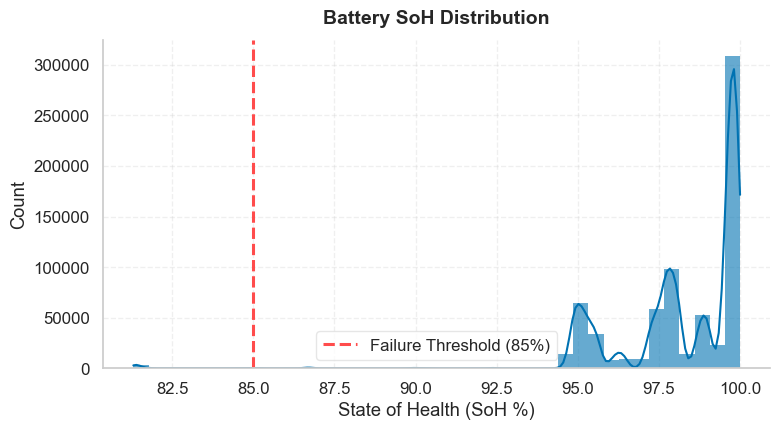

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

sns.set_theme(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(8,4.5))

# KDE + histogram combo with modern palette
sns.histplot(battery['soh'], bins=40, kde=True, color='#0072B2', alpha=0.6, edgecolor='none')
plt.axvline(85, color='#FF4C4C', linestyle='--', linewidth=2.2, label='Failure Threshold (85%)')

plt.title("Battery SoH Distribution", fontsize=14, weight='bold', pad=12)
plt.xlabel("State of Health (SoH %)")
plt.ylabel("Count")
plt.legend(frameon=True, facecolor='white', edgecolor='#E0E0E0')
plt.grid(True, linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

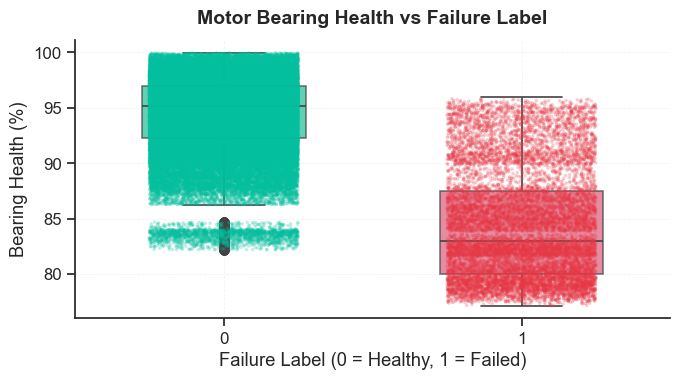

In [134]:
plt.figure(figsize=(7, 4))
sns.set_theme(style="ticks", font_scale=1.1)

# Convert failure column to string to match palette keys
motor['failure'] = motor['failure'].astype(str)

# Boxplot layer (background)
sns.boxplot(
    x='failure',
    y='bearingHealth',
    data=motor,
    hue='failure',
    palette={'0': '#06D6A0', '1': '#EF476F'},
    legend=False,
    width=0.55,
    linewidth=1.2,
    boxprops=dict(alpha=0.7)
)

# Add jittered points with light alpha (foreground)
sns.stripplot(
    x='failure',
    y='bearingHealth',
    data=motor.sample(frac=0.15, random_state=42),  # plot only ~15% for clarity
    hue='failure',
    dodge=False,
    palette={'0': '#04BF9D', '1': '#E63946'},
    alpha=0.25,
    size=2.5,
    jitter=0.25,
    legend=False
)

plt.title("Motor Bearing Health vs Failure Label", fontsize=14, weight='bold', pad=12)
plt.xlabel("Failure Label (0 = Healthy, 1 = Failed)")
plt.ylabel("Bearing Health (%)")

sns.despine()
plt.grid(alpha=0.25, linestyle='--', linewidth=0.6)
plt.tight_layout()
plt.show()

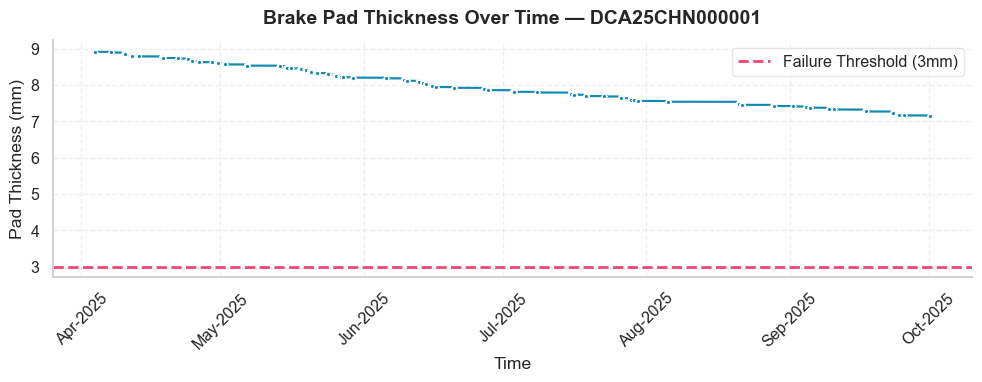

In [135]:
import matplotlib.dates as mdates
plt.figure(figsize=(10,4))
sns.set_theme(style="whitegrid", font_scale=1.05)

# pick one sample VIN
sample_vin = brakepad['vin'].iloc[0]
subset = (
    brakepad.query("vin == @sample_vin")
    .sort_values('timestamp')
    .assign(timestamp=pd.to_datetime(brakepad['timestamp'], errors='coerce'))
)

# line + moving average style
sns.lineplot(
    data=subset,
    x='timestamp',
    y='padThicknessMm',
    marker='o',
    markersize=3,
    linewidth=1.5,
    color='#118AB2'
)

plt.axhline(3, color='#EF476F', linestyle='--', linewidth=2, label='Failure Threshold (3mm)')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
plt.xticks(rotation=45)

plt.title(f"Brake Pad Thickness Over Time — {sample_vin}", fontsize=14, weight='bold', pad=12)
plt.xlabel("Time")
plt.ylabel("Pad Thickness (mm)")
plt.legend(frameon=True, facecolor='white', edgecolor='#E0E0E0')
plt.grid(alpha=0.3, linestyle='--')
sns.despine()
plt.tight_layout()
plt.show()

## FEATURE ENGINEERING

### **BATTERY**

In [41]:
# ================================================================
# ⚙️ Battery Feature Engineering (Post-FailureFlag Pipeline)
# ================================================================
battery['timestamp'] = pd.to_datetime(battery['timestamp'], errors='coerce')
battery = battery.sort_values(['vin', 'timestamp'])

battery_features = battery.copy()

# ================================================================
# 1️⃣ Voltage Stability Features
# ================================================================
battery_features['voltage_range'] = (
    battery_features['maxCellVoltage'] - battery_features['minCellVoltage']
)
battery_features['voltage_stability'] = (
    battery_features.groupby('vin')['cellVoltageDelta']
    .transform(lambda x: x.rolling(window=5, min_periods=1).std())
)

# ================================================================
# 2️⃣ Temperature Dynamics
# ================================================================
battery_features['temp_range'] = (
    battery_features['maxCellTemp'] - battery_features['minCellTemp']
)
battery_features['avg_temp_rolling'] = (
    battery_features.groupby('vin')['avgCellTemp']
    .transform(lambda x: x.rolling(window=10, min_periods=1).mean())
)
battery_features['temp_delta_trend'] = (
    battery_features.groupby('vin')['cellTempDelta']
    .diff()
)

# ================================================================
# 3️⃣ Health & Usage Degradation
# ================================================================
# SOH drop rate (percentage change per second)
battery_features['soh_drop_rate'] = (
    battery_features.groupby('vin')['soh']
    .diff() / battery_features.groupby('vin')['timestamp']
    .diff().dt.total_seconds()
)

# Relative SOH degradation (normalized)
battery_features['soh_norm'] = (
    battery_features['soh'] / battery_features.groupby('vin')['soh'].transform('first')
)

# Simplified cycle efficiency proxy (no capacityFade)
battery_features['energy_efficiency'] = (
    np.abs(battery_features['power']) / (battery_features['totalVoltage'] * (np.abs(battery_features['totalCurrent']) + 1e-3))
)

# ================================================================
# 4️⃣ Current & Power Stress
# ================================================================
battery_features['current_abs'] = np.abs(battery_features['totalCurrent'])
battery_features['power_stress'] = (
    np.abs(battery_features['power']) / (battery_features['totalVoltage'] + 1)
)

# ================================================================
# 5️⃣ Rolling SOH Trends (per VIN)
# ================================================================
battery_features['soh_rolling_mean'] = (
    battery_features.groupby('vin')['soh']
    .transform(lambda x: x.rolling(window=20, min_periods=1).mean())
)
battery_features['soh_rolling_std'] = (
    battery_features.groupby('vin')['soh']
    .transform(lambda x: x.rolling(window=20, min_periods=1).std())
)

# Long-horizon degradation slope (approx 1 day — adjust if needed)
battery_features['soh_slope_daily'] = (
    battery_features.groupby('vin')['soh_rolling_mean']
    .transform(lambda x: x.diff(2880))  # assuming 30s logging → 2880 points ≈ 1 day
)
battery_features['soh_slope_daily_norm'] = (
    battery_features['soh_slope_daily'] / battery_features['soh_rolling_mean']
)

# ================================================================
# 6️⃣ Label Retention
# ================================================================
# keep the failure labels from your earlier pipeline
battery_features['failure'] = battery['failure']
battery_features['failure_in_next_7d'] = battery['failure_in_next_7d']

# ================================================================
# 🧹 Clean-up & Finalize
# ================================================================
battery_features = battery_features.dropna(subset=['vin', 'timestamp', 'soh'])
print("✅ Engineered battery dataset shape:", battery_features.shape)

✅ Engineered battery dataset shape: (698245, 38)


In [43]:
# ================================================================
# 🧹 Post-processing cleanup
# ================================================================
# Replace impossible or constant zeros where appropriate
battery_features.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill rolling/diff NaNs safely
for col in [
    'soh_drop_rate', 'voltage_stability', 'temp_delta_trend',
    'soh_slope_daily', 'soh_slope_daily_norm'
]:
    if col in battery_features.columns:
        battery_features[col] = battery_features[col].fillna(0)

# Drop rows where timestamp or vin missing
battery_features.dropna(subset=['vin', 'timestamp'], inplace=True)

print("📊 Final shape:", battery_features.shape)
print("🧾 NaN count per column:\n", battery_features.isna().sum().sort_values(ascending=False).head(10))

📊 Final shape: (698245, 38)
🧾 NaN count per column:
 soh_rolling_std    50
vin                 0
soc                 0
soh                 0
totalVoltage        0
timestamp           0
totalCurrent        0
power               0
minCellVoltage      0
avgCellVoltage      0
dtype: int64


In [44]:
battery_features.head()

,vin,timestamp,soc,soh,totalVoltage,totalCurrent,power,avgCellVoltage,minCellVoltage,maxCellVoltage,cellVoltageDelta,avgCellTemp,minCellTemp,maxCellTemp,cellTempDelta,coolantInletTemp,coolantOutletTemp,coolantFlowRate,ambientTemperature,cycleCount,energyThroughput,failureFlag,failure,failure_in_next_7d,voltage_range,voltage_stability,temp_range,avg_temp_rolling,temp_delta_trend,soh_drop_rate,soh_norm,energy_efficiency,current_abs,power_stress,soh_rolling_mean,soh_rolling_std,soh_slope_daily,soh_slope_daily_norm
0,DCA25CHN000001,2025-04-03 19:00:00,82.049904,98.0471,306.409981,-115.059721,41.309476,3.529865,3.479865,3.579865,0.1,32.095609,30.095609,34.095609,4.0,28.629171,35.010035,4.682973,27.751068,0,0.0,0,0,0,0.1,0.0,4.0,32.095609,0.0,0.0,1.0,0.001172,115.059721,0.134379,98.0471,NaN,0.0,0.0
1,DCA25CHN000001,2025-04-03 19:00:30,81.759752,98.0471,306.351950,-72.964113,49.901179,3.147570,3.097570,3.197570,0.1,34.421759,32.421759,36.421759,4.0,30.281380,36.328579,7.170552,30.830159,0,0.0,0,0,0,0.1,0.0,4.0,33.258684,0.0,0.0,1.0,0.002232,72.964113,0.162358,98.0471,0.0,0.0,0.0
2,DCA25CHN000001,2025-04-03 19:01:00,81.469600,98.0471,306.293920,97.815954,20.161530,3.176135,3.126135,3.226135,0.1,32.327918,30.327918,34.327918,4.0,26.912780,34.130247,3.330943,36.333267,0,0.0,0,0,0,0.1,0.0,4.0,32.948429,0.0,0.0,1.0,0.000673,97.815954,0.065610,98.0471,0.0,0.0,0.0
3,DCA25CHN000001,2025-04-03 19:01:30,81.179448,98.0471,306.235890,-2.531338,48.042105,3.687065,3.637065,3.737065,0.1,40.714114,38.714114,42.714114,4.0,37.234168,43.075076,5.982045,28.564563,0,0.0,0,0,0,0.1,0.0,4.0,34.889850,0.0,0.0,1.0,0.061950,2.531338,0.156369,98.0471,0.0,0.0,0.0
4,DCA25CHN000001,2025-04-03 19:02:00,80.889296,98.0471,306.177859,25.542974,21.155093,3.079090,3.029090,3.129090,0.1,35.874165,33.874165,37.874165,4.0,30.588278,37.889528,3.532054,35.378428,0,0.0,0,0,0,0.1,0.0,4.0,35.086713,0.0,0.0,1.0,0.002705,25.542974,0.068869,98.0471,0.0,0.0,0.0


#### CHECKUP

In [45]:
battery_check = (
    battery_features.groupby('vin')['soh']
    .agg(['min', 'max'])
    .assign(failure_label=lambda x: (x['min'] < 85).astype(int))
)
battery_fail_vins = battery_check[battery_check['failure_label'] == 1]
print("⚡ Battery failures detected:", len(battery_fail_vins))

⚡ Battery failures detected: 2


In [46]:
battery_fail_vins

,min,max,failure_label
vin,,,
DCA25CHN000016,81.3017,95.7088,1
DCA25CHN000036,81.3017,95.7088,1


### **BRAKEPAD**

In [47]:
# ================================================================
# 🛞 BrakePad Feature Engineering (Post-FailureFlag Pipeline)
# ================================================================
brakepad['timestamp'] = pd.to_datetime(brakepad['timestamp'], errors='coerce')
brakepad = brakepad.sort_values(['vin', 'wheelPosition', 'timestamp'])

brakepad_features = brakepad.copy()

# ================================================================
# 1️⃣ Wear & Degradation Dynamics
# ================================================================
brakepad_features['pad_wear_trend'] = (
    brakepad_features.groupby(['vin', 'wheelPosition'])['padThicknessMm']
    .diff()
)
brakepad_features['wear_rate_rolling'] = (
    brakepad_features.groupby(['vin', 'wheelPosition'])['padWearRate']
    .transform(lambda x: x.rolling(window=10, min_periods=1).mean())
)
brakepad_features['pad_thickness_change'] = (
    brakepad_features.groupby(['vin', 'wheelPosition'])['padThicknessMm']
    .diff(10)  # ~5 minutes at 30s intervals
)

# ================================================================
# 2️⃣ Thermal Stress & Heating Behavior
# ================================================================
brakepad_features['pad_temp_rolling'] = (
    brakepad_features.groupby(['vin', 'wheelPosition'])['padTemperature']
    .transform(lambda x: x.rolling(window=10, min_periods=1).mean())
)
brakepad_features['rotor_temp_rolling'] = (
    brakepad_features.groupby(['vin', 'wheelPosition'])['rotorTemperature']
    .transform(lambda x: x.rolling(window=10, min_periods=1).mean())
)
brakepad_features['temp_spike'] = (
    brakepad_features.groupby(['vin', 'wheelPosition'])['padTemperature']
    .diff()
)
brakepad_features['rotor_temp_spike'] = (
    brakepad_features.groupby(['vin', 'wheelPosition'])['rotorTemperature']
    .diff()
)
brakepad_features['temp_gradient'] = (
    brakepad_features['padTemperature'] - brakepad_features['rotorTemperature']
)

# ================================================================
# 3️⃣ Friction & Braking Dynamics
# ================================================================
brakepad_features['brake_force_per_pressure'] = (
    brakepad_features['brakeForce'] / (brakepad_features['brakePressure'] + 1)
)
brakepad_features['friction_stability'] = (
    brakepad_features.groupby(['vin', 'wheelPosition'])['frictionCoefficient']
    .transform(lambda x: x.rolling(window=20, min_periods=1).std())
)
brakepad_features['fade_indicator'] = (
    (brakepad_features['padTemperature'] > 200).astype(int)  # simple fade proxy
)

# ================================================================
# 4️⃣ Rotor Condition Metrics
# ================================================================
brakepad_features['rotor_wear'] = (
    brakepad_features.groupby(['vin', 'wheelPosition'])['rotorThicknessMm']
    .diff()
)
brakepad_features['rotor_runout_change'] = (
    brakepad_features.groupby(['vin', 'wheelPosition'])['rotorRunout']
    .diff()
)

# ================================================================
# 5️⃣ Rolling & Long-Term Pad Trends
# ================================================================
brakepad_features['pad_thickness_rolling'] = (
    brakepad_features.groupby(['vin', 'wheelPosition'])['padThicknessMm']
    .transform(lambda x: x.rolling(window=20, min_periods=1).mean())
)
brakepad_features['pad_thickness_std'] = (
    brakepad_features.groupby(['vin', 'wheelPosition'])['padThicknessMm']
    .transform(lambda x: x.rolling(window=20, min_periods=1).std())
)

# long-horizon wear slope (~1 day)
brakepad_features['pad_thickness_slope_daily'] = (
    brakepad_features.groupby(['vin', 'wheelPosition'])['padThicknessMm']
    .transform(lambda x: x.diff(2880))  # 30s frequency ≈ 1 day window
)

# ================================================================
# 6️⃣ Add failure labels (aligned with simulation)
# ================================================================
brakepad_features['failure'] = brakepad['failure']
brakepad_features['failure_in_next_7d'] = brakepad['failure_in_next_7d']

# ================================================================
# 🧹 Cleanup — handle NaNs & invalids
# ================================================================
brakepad_features.replace([np.inf, -np.inf], np.nan, inplace=True)
brakepad_features.fillna(0, inplace=True)

# drop rows with missing VINs/timestamps (safety)
brakepad_features.dropna(subset=['vin', 'timestamp'], inplace=True)

print("✅ Engineered brakepad dataset shape:", brakepad_features.shape)
print("🧾 NaN count per column:\n", brakepad_features.isna().sum().sort_values(ascending=False).head(10))

✅ Engineered brakepad dataset shape: (2792980, 31)
🧾 NaN count per column:
 vin                    0
wheelPosition          0
timestamp              0
padThicknessMm         0
padWearRate            0
padTemperature         0
rotorThicknessMm       0
rotorTemperature       0
rotorRunout            0
frictionCoefficient    0
dtype: int64


In [48]:
brakepad_features.head()

,vin,wheelPosition,timestamp,padThicknessMm,padWearRate,padTemperature,rotorThicknessMm,rotorTemperature,rotorRunout,frictionCoefficient,brakeForce,brakePressure,failureFlag,failure,failure_in_next_7d,pad_wear_trend,wear_rate_rolling,pad_thickness_change,pad_temp_rolling,rotor_temp_rolling,temp_spike,rotor_temp_spike,temp_gradient,brake_force_per_pressure,friction_stability,fade_indicator,rotor_wear,rotor_runout_change,pad_thickness_rolling,pad_thickness_std,pad_thickness_slope_daily
0,DCA25CHN000001,FL,2025-04-03 19:00:00,8.936099,0.000782,73.252924,29.171532,78.859943,0.038054,0.402007,452.260775,9.045216,0,0,0,0.000000,0.000782,0.0,73.252924,78.859943,0.000000,0.000000,-5.607019,45.022506,0.000000,0,0.000000,0.000000,8.936099,0.000000,0.0
4,DCA25CHN000001,FL,2025-04-03 19:00:30,8.935827,0.000776,70.167647,29.625945,79.164731,0.060515,0.427097,558.437672,11.168753,0,0,0,-0.000272,0.000779,0.0,71.710285,79.012337,-3.085277,0.304788,-8.997084,45.891116,0.017741,0,0.454413,0.022461,8.935963,0.000192,0.0
10,DCA25CHN000001,FL,2025-04-03 19:01:00,8.935585,0.000989,71.461125,29.875101,62.897614,0.054752,0.380088,358.096934,7.161939,0,0,0,-0.000242,0.000849,0.0,71.627232,73.640763,1.293478,-16.267117,8.563511,43.874004,0.023522,0,0.249156,-0.005763,8.935837,0.000257,0.0
12,DCA25CHN000001,FL,2025-04-03 19:01:30,8.935307,0.000999,79.543988,29.809816,93.358411,0.066979,0.383903,205.278856,4.105577,0,0,0,-0.000278,0.000887,0.0,73.606421,78.570175,8.082863,30.460797,-13.814423,40.206788,0.021463,0,-0.065285,0.012227,8.935705,0.000338,0.0
18,DCA25CHN000001,FL,2025-04-03 19:02:00,8.935035,0.001017,86.433441,29.853007,102.093977,0.092338,0.387016,584.655415,11.693108,0,0,0,-0.000271,0.000913,0.0,76.171825,83.274935,6.889452,8.735565,-15.660536,46.060855,0.019257,0,0.043191,0.025359,8.935571,0.000419,0.0


##### SANITY CHECKS

In [49]:
pad_check = (
    brakepad_features.groupby(['vin', 'wheelPosition'])['padThicknessMm']
    .agg(['min', 'max'])
    .assign(failure_label=lambda x: (x['min'] <= 3).astype(int))
)
print("🛠️ Brake failures:", pad_check['failure_label'].sum())

🛠️ Brake failures: 28


In [51]:
brakepad_fail_vins = pad_check[pad_check['failure_label'] == 1]
brakepad_fail_vins

min        max  failure_label
vin            wheelPosition                                    
DCA25CHN000016 FL             0.800000  12.427543              1
               FR             0.800000  12.427543              1
               RL             0.800000  12.427543              1
               RR             0.800000  12.427543              1
DCA25CHN000018 FL             0.800000  11.890407              1
               FR             0.800000  11.890407              1
               RL             0.800000  11.890407              1
               RR             0.800000  11.890407              1
DCA25CHN000019 FL             0.800000   6.173200              1
               FR             0.800000   6.173200              1
               RL             0.800000   6.173200              1
               RR             0.800000   6.173200              1
DCA25CHN000036 FL             0.800000  12.427543              1
               FR             0.800000  12.427543              1
               RL             0.800000  12.427543              1
               RR             0.800000  12.427543              1
DCA25CHN000038 FL             0.800000  11.890407              1
               FR             0.800000  11.890407              1
               RL             0.800000  11.890407              1
               RR             0.800000  11.890407              1
DCA25CHN000039 FL             0.800000   6.173200              1
               FR             0.800000   6.173200              1
               RL             0.800000   6.173200              1
               RR             0.800000   6.173200              1
DCA25CHN000043 FL             1.909951   5.841609              1
               FR             1.778047   5.841609              1
               RL             1.680791   5.841609              1
               RR             1.537910   5.841609              1

In [17]:
brakepad_features.groupby('vin')['padWearRate'].describe().head()

,count,mean,std,min,25%,50%,75%,max
vin,,,,,,,,
DCA25CHN000001,39640.0,0.001370,0.000222,0.000506,0.001226,0.001367,0.001515,0.002191
DCA25CHN000002,36160.0,0.001287,0.000216,0.000574,0.001128,0.001269,0.001423,0.002182
DCA25CHN000003,70412.0,0.000250,0.000046,0.000139,0.000217,0.000244,0.000279,0.000431
DCA25CHN000004,26596.0,0.001339,0.000255,0.000655,0.001174,0.001315,0.001466,0.002432
DCA25CHN000005,36008.0,0.001291,0.000219,0.000544,0.001135,0.001275,0.001429,0.002141


In [18]:
corr = brakepad_features[['padTemperature', 'padWearRate']].corr().iloc[0,1]
print("🔥 Temp–Wear correlation:", round(corr, 3))

🔥 Temp–Wear correlation: 0.856


### **MOTOR**

In [52]:
print(motor['efficiency'].describe())            # expected min ~86–87, max ~97
print(motor['vibrationRms'].describe())          # typical 0.6–8, max > 10 for failures
print(motor.groupby('vin')['efficiency'].agg(['first','min','max']).head())
print("Motor failures (rows):", motor['failureFlag'].sum())
print("Motor failures (VINs):", motor.groupby('vin')['failureFlag'].max().sum())

count    698245.000000
mean         89.003399
std           2.376603
min          85.500171
25%          87.371133
50%          87.439684
75%          90.416458
max          96.489401
Name: efficiency, dtype: float64
count    698245.000000
mean          2.582870
std           1.102012
min           0.600000
25%           1.988000
50%           2.383000
75%           2.842000
max          10.871529
Name: vibrationRms, dtype: float64
                    first        min        max
vin                                            
DCA25CHN000001  92.503944  87.324199  93.790190
DCA25CHN000002  96.234198  87.336373  96.432455
DCA25CHN000003  95.662981  87.416589  96.478590
DCA25CHN000004  91.795502  87.290454  93.908104
DCA25CHN000005  94.753158  87.298589  96.428688
Motor failures (rows): 87374
Motor failures (VINs): 6


In [53]:
# ================================================================
# ⚙️ Motor Feature Engineering (Post-FailureFlag Pipeline)
# ================================================================
motor['timestamp'] = pd.to_datetime(motor['timestamp'], errors='coerce')
motor = motor.sort_values(['vin', 'motorId', 'timestamp'])

motor_features = motor.copy()

# ================================================================
# 1️⃣ Bearing & Vibration Health
# ================================================================
motor_features['bearing_health_change'] = (
    motor_features.groupby(['vin', 'motorId'])['bearingHealth'].diff()
)
motor_features['vibration_rolling_mean'] = (
    motor_features.groupby(['vin', 'motorId'])['vibrationRms']
    .transform(lambda x: x.rolling(window=10, min_periods=1).mean())
)
motor_features['vibration_spike'] = (
    motor_features.groupby(['vin', 'motorId'])['vibrationRms'].diff()
)
motor_features['bearing_deg_rate'] = (
    -motor_features['bearing_health_change'] / (motor_features['bearingHealth'] + 1e-3)
)

# ================================================================
# 2️⃣ Thermal Performance & Heat Stress
# ================================================================
motor_features['stator_temp_rolling'] = (
    motor_features.groupby(['vin', 'motorId'])['statorTemp']
    .transform(lambda x: x.rolling(window=10, min_periods=1).mean())
)
motor_features['rotor_temp_rolling'] = (
    motor_features.groupby(['vin', 'motorId'])['rotorTemp']
    .transform(lambda x: x.rolling(window=10, min_periods=1).mean())
)
motor_features['bearing_temp_rolling'] = (
    motor_features.groupby(['vin', 'motorId'])['bearingTemp']
    .transform(lambda x: x.rolling(window=10, min_periods=1).mean())
)
motor_features['temp_diff_stator_rotor'] = (
    motor_features['statorTemp'] - motor_features['rotorTemp']
)
motor_features['temp_stress_index'] = (
    (motor_features['statorTemp'] - 100) / 40
).clip(0, 1)

# ================================================================
# 3️⃣ Electrical Balance & Stability
# ================================================================
motor_features['phase_current_imbalance'] = motor_features[
    ['phaseCurrentA', 'phaseCurrentB', 'phaseCurrentC']
].std(axis=1)
motor_features['phase_voltage_imbalance'] = motor_features[
    ['phaseVoltageA', 'phaseVoltageB', 'phaseVoltageC']
].std(axis=1)
motor_features['power_factor_stability'] = (
    motor_features.groupby(['vin', 'motorId'])['powerFactor']
    .transform(lambda x: x.rolling(window=20, min_periods=1).std())
)

# ================================================================
# 4️⃣ Efficiency, Torque & Power Behavior
# ================================================================
motor_features['power_per_torque'] = (
    motor_features['powerKw'] / (motor_features['torqueNm'] + 1e-5)
)
motor_features['efficiency_rolling'] = (
    motor_features.groupby(['vin', 'motorId'])['efficiency']
    .transform(lambda x: x.rolling(window=15, min_periods=1).mean())
)
motor_features['efficiency_slope_daily'] = (
    motor_features.groupby(['vin', 'motorId'])['efficiency_rolling']
    .transform(lambda x: x.diff(2880))  # ~1 day @ 30s freq
)
motor_features['eff_drop_pct'] = (
    (motor_features.groupby('vin')['efficiency'].transform('first') - motor_features['efficiency'])
    / motor_features.groupby('vin')['efficiency'].transform('first')
) * 100
motor_features['torque_stability'] = (
    motor_features.groupby(['vin', 'motorId'])['torqueNm']
    .transform(lambda x: x.rolling(window=15, min_periods=1).std())
)

# ================================================================
# 5️⃣ Insulation & Reliability Trends
# ================================================================
motor_features['insulation_drop'] = (
    motor_features.groupby(['vin', 'motorId'])['insulationResistance'].diff()
)
motor_features['insulation_drop_rate'] = (
    -motor_features['insulation_drop'] / (motor_features['insulationResistance'] + 1e-3)
)

# ================================================================
# 6️⃣ Failure & Predictive Labels
# ================================================================
motor_features['failure'] = motor['failure']
motor_features['failure_in_next_7d'] = motor['failure_in_next_7d']

# ================================================================
# 🧹 Final Cleanup
# ================================================================
motor_features.replace([np.inf, -np.inf], np.nan, inplace=True)
motor_features.fillna(0, inplace=True)
motor_features.dropna(subset=['vin', 'timestamp'], inplace=True)

print("✅ Engineered motor dataset shape:", motor_features.shape)
print("🧾 NaN count per column:\n", motor_features.isna().sum().sort_values(ascending=False).head(10))

✅ Engineered motor dataset shape: (698245, 45)
🧾 NaN count per column:
 vin              0
motorId          0
motorPosition    0
timestamp        0
odometer         0
speedRpm         0
torqueNm         0
powerKw          0
efficiency       0
statorTemp       0
dtype: int64


In [54]:
motor_features.head()

,vin,motorId,motorPosition,timestamp,odometer,speedRpm,torqueNm,powerKw,efficiency,statorTemp,rotorTemp,bearingTemp,coolantTemp,phaseCurrentA,phaseCurrentB,phaseCurrentC,phaseVoltageA,phaseVoltageB,phaseVoltageC,powerFactor,vibrationRms,bearingHealth,insulationResistance,failureFlag,failure,failure_in_next_7d,bearing_health_change,vibration_rolling_mean,vibration_spike,bearing_deg_rate,stator_temp_rolling,rotor_temp_rolling,bearing_temp_rolling,temp_diff_stator_rotor,temp_stress_index,phase_current_imbalance,phase_voltage_imbalance,power_factor_stability,power_per_torque,efficiency_rolling,efficiency_slope_daily,eff_drop_pct,torque_stability,insulation_drop,insulation_drop_rate
0,DCA25CHN000001,DCA25CHN000001_M1,Front,2025-04-03 19:00:00,10375.161328,2079.864154,189.440996,41.309476,92.503944,95.288735,100.853268,104.677548,93.966492,97.521441,81.142516,97.975349,97.403690,95.294240,112.970918,0.911130,2.269,96.660736,523.360176,0,0,0,0.000000,2.269000,0.000,0.000000,95.288735,100.853268,104.677548,-5.564533,0.000000,9.590095,9.654475,0.000000,0.218060,92.503944,0.0,0.000000,0.000000,0.000000,0.000000
1,DCA25CHN000001,DCA25CHN000001_M1,Front,2025-04-03 19:00:30,10376.080427,2259.117044,211.054318,49.901179,92.320529,99.613483,103.135337,109.082885,98.449416,112.406772,113.674667,92.757896,110.125167,105.273233,120.217921,0.910751,2.483,96.659970,574.816572,0,0,0,-0.000766,2.376000,0.214,0.000008,97.451109,101.994303,106.880217,-3.521855,0.000000,11.727441,7.623960,0.000268,0.236438,92.412236,0.0,0.198278,15.282927,51.456395,-0.089518
2,DCA25CHN000001,DCA25CHN000001_M1,Front,2025-04-03 19:01:00,10376.999526,1303.956903,147.602575,20.161530,93.749873,99.228422,103.534412,109.104648,99.868595,65.652019,71.627198,83.354407,72.412457,55.336888,65.412791,0.913609,2.903,96.659204,446.395919,0,0,0,-0.000766,2.551667,0.420,0.000008,98.043547,102.507673,107.621694,-4.305990,0.000000,9.005598,8.583843,0.001552,0.136593,92.858115,0.0,-1.346893,32.258624,-128.420653,0.287683
3,DCA25CHN000001,DCA25CHN000001_M1,Front,2025-04-03 19:01:30,10377.918624,3101.546426,147.864304,48.042105,93.004280,92.054416,95.339842,99.703414,89.638028,65.740248,78.300558,64.176367,158.896076,152.812028,163.811921,0.912120,2.374,96.658438,517.512599,0,0,0,-0.000766,2.507250,-0.529,0.000008,96.546264,100.715715,105.642124,-3.285426,0.000000,7.742737,5.510275,0.001276,0.324907,92.894656,0.0,-0.540881,31.577129,71.116680,-0.137420
4,DCA25CHN000001,DCA25CHN000001_M1,Front,2025-04-03 19:02:00,10378.837723,1526.516086,132.263625,21.155093,93.201911,102.177370,111.121934,115.752385,106.342534,59.096660,58.460278,80.330905,74.187759,84.166735,78.948577,0.912519,3.475,96.657672,492.056289,0,0,0,-0.000766,2.700800,1.101,0.000008,97.672485,102.796959,107.664176,-8.944564,0.054434,12.447373,4.991235,0.001139,0.159946,92.956107,0.0,-0.754527,33.106850,-25.456310,0.051734


In [60]:
# VINs detected from failureFlag (simulation-based)
sim_fail_vins = motor.loc[motor['failureFlag'] == 1, 'vin'].unique().tolist()

# VINs detected from analytic threshold-based check
analytic_fail_vins = motor_fail_check.loc[motor_fail_check['failure_label'] == 1].index.tolist()

# Compare
sim_fail_vins_set = set(sim_fail_vins)
analytic_fail_vins_set = set(analytic_fail_vins)

print("🧩 VINs in simulation failure:", len(sim_fail_vins_set))
print("📈 VINs in analytic failure:", len(analytic_fail_vins_set))
print("🔍 VINs overlap:", len(sim_fail_vins_set & analytic_fail_vins_set))
print("\n🚫 Extra VINs in analytic check (false positives):")
print(sorted(list(analytic_fail_vins_set - sim_fail_vins_set)))

print("\n⚠️ Missing VINs (flagged in sim but not analytic):")
print(sorted(list(sim_fail_vins_set - analytic_fail_vins_set)))

🧩 VINs in simulation failure: 6
📈 VINs in analytic failure: 21
🔍 VINs overlap: 3

🚫 Extra VINs in analytic check (false positives):
['DCA25CHN000002', 'DCA25CHN000003', 'DCA25CHN000006', 'DCA25CHN000012', 'DCA25CHN000014', 'DCA25CHN000017', 'DCA25CHN000020', 'DCA25CHN000022', 'DCA25CHN000023', 'DCA25CHN000026', 'DCA25CHN000032', 'DCA25CHN000034', 'DCA25CHN000037', 'DCA25CHN000040', 'DCA25CHN000041', 'DCA25CHN000044', 'DCA25CHN000048', 'DCA25CHN000050']

⚠️ Missing VINs (flagged in sim but not analytic):
['DCA25CHN000007', 'DCA25CHN000027', 'DCA25CHN000042']


## BASELINE ML MODELS

### FLEET LEVEL - Logistic Regression

In [62]:
# ================================================================
# 🚗 1️⃣ BATTERY SUMMARY — compact + failure-aware
# ================================================================
battery_summary = (
    battery_features.groupby("vin").agg({
        "soh": ["mean", "min"],
        "soh_drop_rate": "mean",
        "temp_range": "mean",
        "voltage_range": "mean",
        "power_stress": "mean",
        "avgCellTemp": "mean",
        "failure": "max"
    })
)
battery_summary.columns = ["_".join(c) for c in battery_summary.columns]
battery_summary = battery_summary.reset_index().rename(
    columns={"failure_max": "battery_failure"}
)

# ================================================================
# 🛞 2️⃣ BRAKEPAD SUMMARY
# ================================================================
brake_summary = (
    brakepad_features.groupby("vin").agg({
        "padThicknessMm": ["mean", "min"],
        "wear_rate_rolling": "mean",
        "pad_temp_rolling": "mean",
        "friction_stability": "mean",
        "temp_spike": "max",
        "rotor_wear": "mean",
        "failure": "max"
    })
)
brake_summary.columns = ["_".join(c) for c in brake_summary.columns]
brake_summary = brake_summary.reset_index().rename(
    columns={"failure_max": "brake_failure"}
)

# ================================================================
# ⚙️ 3️⃣ MOTOR SUMMARY
# ================================================================
motor_summary = (
    motor_features.groupby("vin").agg({
        "efficiency": ["mean", "min"],
        "vibrationRms": ["mean", "max"],
        "bearingHealth": ["mean", "min"],
        "temp_stress_index": "mean",
        "phase_current_imbalance": "mean",
        "failure": "max"
    })
)
motor_summary.columns = ["_".join(c) for c in motor_summary.columns]
motor_summary = motor_summary.reset_index().rename(
    columns={"failure_max": "motor_failure"}
)

# ================================================================
# 🧩 4️⃣ MERGE SUBSYSTEM SUMMARIES
# ================================================================
fleet_level = (
    battery_summary
    .merge(brake_summary, on="vin", how="outer", suffixes=("_bat", "_brk"))
    .merge(motor_summary, on="vin", how="outer")
    .fillna(0)
)

# ================================================================
# ⚡ 5️⃣ CREATE FAILURE FLAGS — lifetime + current
# ================================================================
fleet_level["failure_lifetime"] = (
    (fleet_level["battery_failure"] |
     fleet_level["brake_failure"] |
     fleet_level["motor_failure"])
).astype(int)

# ================================================================
# ⏱️ 6️⃣ CURRENT FAILURE STATUS — last window logic
# ================================================================
def latest_failure_status(df, id_col="vin", fail_col="failure"):
    """Mark VINs that show failure in last 5% of samples."""
    latest = []
    for vin, group in df.groupby(id_col):
        group = group.sort_values("timestamp")
        tail_n = max(1, int(len(group) * 0.05))
        latest_flag = int(group[fail_col].tail(tail_n).mean() > 0.5)
        latest.append((vin, latest_flag))
    return pd.DataFrame(latest, columns=[id_col, f"{fail_col}_current"])

battery_last = latest_failure_status(battery_features, "vin", "failure").rename(
    columns={"failure_current": "battery_failure_current"}
)
brake_last = latest_failure_status(brakepad_features, "vin", "failure").rename(
    columns={"failure_current": "brake_failure_current"}
)
motor_last = latest_failure_status(motor_features, "vin", "failure").rename(
    columns={"failure_current": "motor_failure_current"}
)

fleet_level = (
    fleet_level
    .merge(battery_last, on="vin", how="left")
    .merge(brake_last, on="vin", how="left")
    .merge(motor_last, on="vin", how="left")
)

fleet_level = fleet_level.fillna(0)

fleet_level["failure_current"] = (
    (fleet_level["battery_failure_current"] |
     fleet_level["brake_failure_current"] |
     fleet_level["motor_failure_current"])
).astype(int)

# ================================================================
# 🧹 7️⃣ FINAL CLEANUP — keep only ML-relevant columns
# ================================================================
keep_cols = [
    "vin",
    # battery
    "soh_mean", "soh_min", "soh_drop_rate_mean",
    "temp_range_mean", "voltage_range_mean", "power_stress_mean",
    # brake
    "padThicknessMm_mean", "padThicknessMm_min", "wear_rate_rolling_mean",
    "pad_temp_rolling_mean", "friction_stability_mean", "temp_spike_max",
    # motor
    "efficiency_mean", "efficiency_min", "vibrationRms_mean",
    "bearingHealth_mean", "temp_stress_index_mean",
    # labels
    "failure_lifetime", "failure_current"
]
fleet_level = fleet_level[[c for c in keep_cols if c in fleet_level.columns]]

# ================================================================
# ✅ CHECKPOINT — ready for ML
# ================================================================
print("✅ Fleet-level dataset ready for ML!")
print(f"Shape: {fleet_level.shape}")
print(fleet_level[['failure_lifetime', 'failure_current']].value_counts())

✅ Fleet-level dataset ready for ML!
Shape: (50, 20)
failure_lifetime  failure_current
0                 0                  41
1                 1                   6
                  0                   3
Name: count, dtype: int64


In [71]:
# ================================================================
# 🎯 1️⃣ Define Features (X) and Target (y)
# ================================================================
target = "failure_current"
X = fleet_level.drop(columns=["vin", "failure_lifetime", "failure_current"])
y = fleet_level[target].astype(int)

print(f"Feature matrix shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts(normalize=True).round(3)}")

# ================================================================
# 🧹 2️⃣ Automatically Drop Leaky or Redundant Columns
# ================================================================
# Compute correlation with the target
corr = pd.concat([X, y], axis=1).corr()[target].drop(target)
leaky_cols = corr[abs(corr) > 0.9].index.tolist()  # super-high correlation = suspicious leak
if leaky_cols:
    print(f"⚠️ Dropping leaky columns (corr > 0.9): {leaky_cols}")
    X = X.drop(columns=leaky_cols)
else:
    print("✅ No highly correlated (leaky) columns found.")

Feature matrix shape: (50, 17)
Target distribution:
failure_current
0    0.88
1    0.12
Name: proportion, dtype: float64
✅ No highly correlated (leaky) columns found.


In [72]:
# ================================================================
# ⚙️ 3️⃣ Scale Features
# ================================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("🔧 Features scaled and ready for ML!")

🔧 Features scaled and ready for ML!


In [81]:
# ================================================================
# 🧠 4️⃣ Cross-Validation Setup
# ================================================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [82]:
# ================================================================
# 💡 5️⃣ Logistic Regression (Baseline)
# ================================================================
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_scores = cross_val_score(log_reg, X_scaled, y, cv=cv, scoring="roc_auc")

print("\n🔹 Logistic Regression Cross-Validation Results 🔹")
print(f"ROC-AUC: {log_scores.mean():.3f} ± {log_scores.std():.3f}")


🔹 Logistic Regression Cross-Validation Results 🔹
ROC-AUC: 0.867 ± 0.178


### FLEET LEVEL PRE - XGBoost

In [90]:
def pre_failure_subset(df):
    """Keep data only up to first failure per VIN."""
    pre_df = []
    for vin, group in df.groupby("vin"):
        group = group.sort_values("timestamp")
        fail_idx = group.index[group["failure"] == 1]
        if len(fail_idx) > 0:
            cutoff = fail_idx[0]
            group = group.loc[:cutoff]  # keep until failure
        pre_df.append(group)
    return pd.concat(pre_df, ignore_index=True)

battery_pre = pre_failure_subset(battery_features)
motor_pre = pre_failure_subset(motor_features)
brakepad_pre = pre_failure_subset(brakepad_features)

In [91]:
# ================================================================
# 🔄 1️⃣ Rebuild summaries using only pre-failure subsets
# ================================================================
def build_summary(df, group_cols, agg_dict, fail_name):
    summary = df.groupby(group_cols).agg(agg_dict)
    summary.columns = ["_".join(c) for c in summary.columns]
    summary = summary.reset_index().rename(columns={"failure_max": fail_name})
    return summary

# --- Battery Summary ---
battery_summary_pre = build_summary(
    battery_pre,
    "vin",
    {
        "soh": ["last", "mean", "min"],
        "soh_drop_rate": "mean",
        "temp_range": "mean",
        "voltage_range": "mean",
        "power_stress": "mean",
        "cellVoltageDelta": "max",
        "avgCellTemp": "mean",
        "cycleCount": "last",
        "failure": "max",
    },
    "battery_failure"
)

# --- Brake Summary ---
brake_summary_pre = build_summary(
    brakepad_pre,
    "vin",
    {
        "padThicknessMm": ["last", "mean", "min"],
        "wear_rate_rolling": "mean",
        "pad_temp_rolling": "mean",
        "temp_spike": "max",
        "friction_stability": "mean",
        "rotor_wear": "mean",
        "failure": "max",
    },
    "brake_failure"
)

# --- Motor Summary ---
motor_summary_pre = build_summary(
    motor_pre,
    "vin",
    {
        "efficiency": ["mean", "min"],
        "vibrationRms": ["mean", "max"],
        "insulationResistance": "mean",
        "bearingHealth": ["last", "mean"],
        "temp_stress_index": "mean",
        "failure": "max",
    },
    "motor_failure"
)

# ================================================================
# 🧩 2️⃣ Merge them to make pre-failure fleet dataset
# ================================================================
fleet_level_pre = (
    battery_summary_pre
    .merge(brake_summary_pre, on="vin", how="outer", suffixes=("_bat", "_brk"))
    .merge(motor_summary_pre, on="vin", how="outer")
    .fillna(0)
)

fleet_level_pre["failure_lifetime"] = (
    fleet_level_pre["battery_failure"] |
    fleet_level_pre["brake_failure"] |
    fleet_level_pre["motor_failure"]
).astype(int)

# keep consistent target
fleet_level_pre["failure_current"] = fleet_level_pre["failure_lifetime"]

print("✅ Fleet-level (pre-failure) summary ready!")
print(fleet_level_pre[["failure_lifetime"]].value_counts())

✅ Fleet-level (pre-failure) summary ready!
failure_lifetime
0                   41
1                    9
Name: count, dtype: int64


In [92]:
X = fleet_level_pre.drop(columns=["vin", "failure_lifetime", "failure_current"])
y = fleet_level_pre["failure_current"].astype(int)
groups = fleet_level_pre["vin"]

In [137]:
from sklearn.model_selection import GroupKFold

xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=(len(y) - y.sum()) / y.sum(),
    eval_metric="auc"
)

# ------------------------------------------------------------
# 3️⃣ Grouped cross-validation
# ------------------------------------------------------------
gkf = GroupKFold(n_splits=5)
auc_scores = []

for fold, (train_idx, val_idx) in enumerate(gkf.split(X, y, groups)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # train model
    xgb.fit(X_train, y_train)

    # predict probabilities
    y_pred = xgb.predict_proba(X_val)[:, 1]

    # only compute AUC if both classes exist
    if len(np.unique(y_val)) > 1:
        auc = roc_auc_score(y_val, y_pred)
        auc_scores.append(auc)
        print(f"Fold {fold+1} AUC: {auc:.3f}")
    else:
        print(f"Fold {fold+1}: ⚠️ Only one class present, skipping AUC.")

# ------------------------------------------------------------
# 4️⃣ Print final summary
# ------------------------------------------------------------
if auc_scores:
    print(f"\n✅ Grouped CV ROC-AUC: {np.mean(auc_scores):.3f} ± {np.std(auc_scores):.3f}")
else:
    print("\n🚫 No valid folds for ROC-AUC (all single-class).")

Fold 1 AUC: 1.000
Fold 2 AUC: 1.000
Fold 3 AUC: 1.000
Fold 4 AUC: 0.905
Fold 5 AUC: 1.000

✅ Grouped CV ROC-AUC: 0.981 ± 0.038


C:\Users\suhan\AppData\Local\Temp\ipykernel_23000\1618881480.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


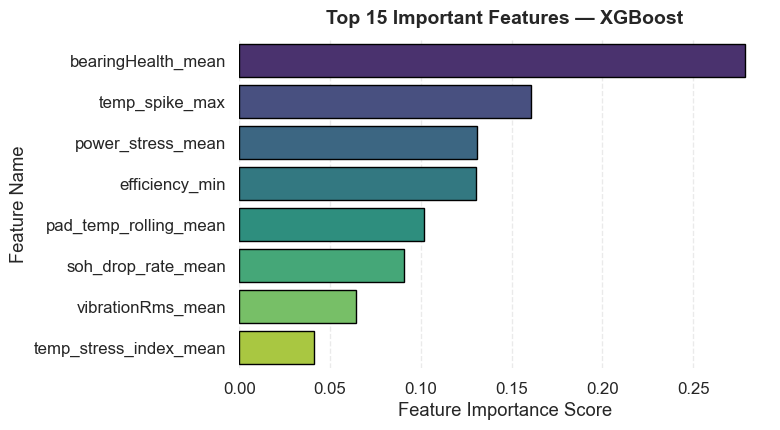

In [138]:
# Build importance series safely
xgb_importance = (
    pd.Series(xgb.feature_importances_, index=X.columns)
    .sort_values(ascending=False)
    .head(15)
)

# 🎨 Styled visualization
plt.figure(figsize=(8, 4.5))
sns.set_theme(style="whitegrid", font_scale=1.1)

sns.barplot(
    x=xgb_importance.values,
    y=xgb_importance.index,
    palette="viridis",
    edgecolor='black'
)

plt.title("Top 15 Important Features — XGBoost", fontsize=14, weight='bold', pad=12)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.grid(axis='x', linestyle='--', alpha=0.4)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## BAYESIAN PREDICTIVE MAINTENANCE

In [96]:
# ================================================================
# 🎯 1️⃣ Feature Selection (key predictors from pre-failure data)
# ================================================================
features = [
    "vibrationRms_mean",
    "soh_drop_rate_mean",
    "temp_spike_max",
    "power_stress_mean",
    "pad_temp_rolling_mean",
    "bearingHealth_mean",
    "efficiency_min",
    "temp_stress_index_mean"
]

# build dataset
df_bayes = fleet_level_pre.dropna(subset=features + ["failure_current"]).copy()

X = df_bayes[features]
y = df_bayes["failure_current"].astype(int)

print("✅ Bayesian model data ready!")
print(f"X shape: {X.shape}, y positive ratio: {y.mean():.2f}")

✅ Bayesian model data ready!
X shape: (50, 8), y positive ratio: 0.18


In [97]:
# ================================================================
# ⚙️ 2️⃣ Standardize features (important for MCMC stability)
# ================================================================
X_std = (X - X.mean()) / X.std()

# ================================================================
# 🧠 3️⃣ Define Bayesian Logistic Regression Model
# ================================================================
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

with pm.Model() as bayes_model:
    # data containers
    X_shared = pm.Data("X_shared", X_std)
    y_shared = pm.Data("y_shared", y)

    # Priors
    alpha = pm.Normal("alpha", mu=0, sigma=5)
    betas = pm.Normal("betas", mu=0, sigma=2, shape=X_std.shape[1])

    # Logistic model
    mu = alpha + pm.math.dot(X_shared, betas)
    p = pm.Deterministic("p", pm.math.sigmoid(mu))

    # Likelihood
    y_obs = pm.Bernoulli("y_obs", p=p, observed=y_shared)

    # Sampling
    trace = pm.sample(
        2000,
        tune=1000,
        target_accept=0.9,
        random_seed=42,
        cores=2,
        chains=2,
        progressbar=True
    )

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, betas]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 271 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat                 feature
alpha    -3.653  1.230  -6.064   -1.482      0.023    0.022  2968.863  2744.417  1.000               intercept
betas[0]  0.512  1.634  -2.568    3.626      0.027    0.025  3549.523  2680.060  1.001       vibrationRms_mean
betas[1] -0.550  1.714  -3.759    2.653      0.027    0.027  3933.085  2515.620  1.000      soh_drop_rate_mean
betas[2]  1.991  1.146  -0.134    4.107      0.022    0.018  2919.824  2788.790  1.000          temp_spike_max
betas[3] -0.762  1.056  -2.673    1.306      0.019    0.016  3020.731  2599.035  1.000       power_stress_mean
betas[4] -0.075  1.720  -3.326    3.080      0.027    0.031  3974.596  2840.844  1.000   pad_temp_rolling_mean
betas[5] -2.597  1.271  -4.943   -0.294      0.024    0.017  2904.432  2950.820  1.000      bearingHealth_mean
betas[6]  3.439  1.075   1.507    5.405      0.021    0.018  2782.215  2244.411  1.000          efficiency_min
b

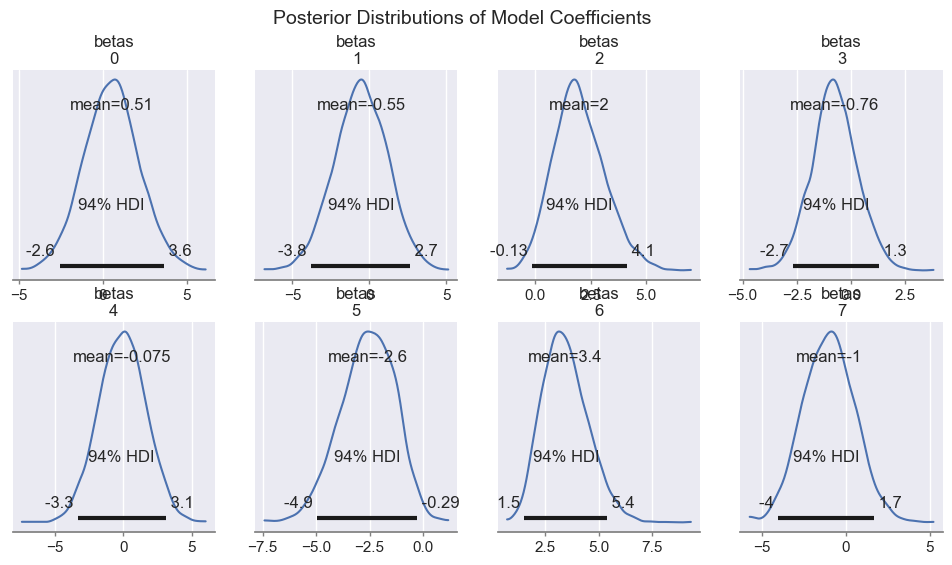

In [98]:
# ================================================================
# 📊 4️⃣ Posterior Summary + Interpretation
# ================================================================
summary = az.summary(trace, var_names=["alpha", "betas"], round_to=3)
summary["feature"] = ["intercept"] + features
print(summary)

# visualize posterior distributions
az.plot_posterior(trace, var_names=["betas"], hdi_prob=0.94, figsize=(12, 6))
plt.suptitle("Posterior Distributions of Model Coefficients", fontsize=14)
plt.show()

In [99]:
# ================================================================
# 🔮 5️⃣ Posterior Predictive Check
# ================================================================
with bayes_model:
    post_pred = pm.sample_posterior_predictive(trace, var_names=["y_obs", "p"])

# extract predictions
y_pred_samples = post_pred.posterior_predictive["y_obs"].values.reshape(-1, len(y))
y_pred_mean = y_pred_samples.mean(axis=0)
y_pred_std = y_pred_samples.std(axis=0)

Sampling: [y_obs]


Output()

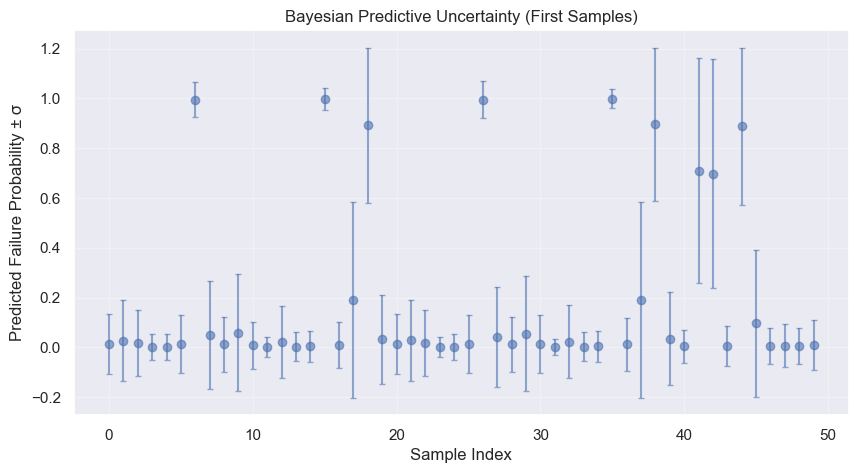

In [103]:
n_samples = min(100, len(y_pred_mean), len(y_pred_std))
plt.figure(figsize=(10, 5))
plt.errorbar(
    np.arange(n_samples),
    y_pred_mean[:n_samples],
    yerr=y_pred_std[:n_samples],
    fmt="o",
    alpha=0.6,
    capsize=2
)
plt.title("Bayesian Predictive Uncertainty (First Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Failure Probability ± σ")
plt.grid(True, alpha=0.3)
plt.show()

In [101]:
# ================================================================
# 🧩 7️⃣ Evaluate Predictive Performance
# ================================================================
y_pred_bayes = (y_pred_mean > 0.5).astype(int)

print("\n📈 Bayesian Predictive Maintenance Performance:")
print(classification_report(y, y_pred_bayes, digits=3))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_bayes))
print("ROC-AUC Score:", roc_auc_score(y, y_pred_mean))


📈 Bayesian Predictive Maintenance Performance:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        41
           1      1.000     1.000     1.000         9

    accuracy                          1.000        50
   macro avg      1.000     1.000     1.000        50
weighted avg      1.000     1.000     1.000        50

Confusion Matrix:
 [[41  0]
 [ 0  9]]
ROC-AUC Score: 1.0


In [102]:
# ================================================================
# 🧠 8️⃣ Interpretability — Posterior Mean Coefficients
# ================================================================
coef_means = trace.posterior["betas"].mean(dim=("chain", "draw")).values
coef_stds = trace.posterior["betas"].std(dim=("chain", "draw")).values

coef_summary = pd.DataFrame({
    "Feature": features,
    "Posterior Mean": coef_means,
    "Posterior Std": coef_stds
}).sort_values(by="Posterior Mean", ascending=False)

print("\n🔍 Top Predictors (Bayesian Coefficients):")
display(coef_summary)


🔍 Top Predictors (Bayesian Coefficients):


,Feature,Posterior Mean,Posterior Std
6,efficiency_min,3.438881,1.075008
2,temp_spike_max,1.991376,1.145446
0,vibrationRms_mean,0.512450,1.633777
4,pad_temp_rolling_mean,-0.075424,1.720227
1,soh_drop_rate_mean,-0.549715,1.714231
3,power_stress_mean,-0.761781,1.055438
7,temp_stress_index_mean,-1.018624,1.535713
5,bearingHealth_mean,-2.596718,1.270773


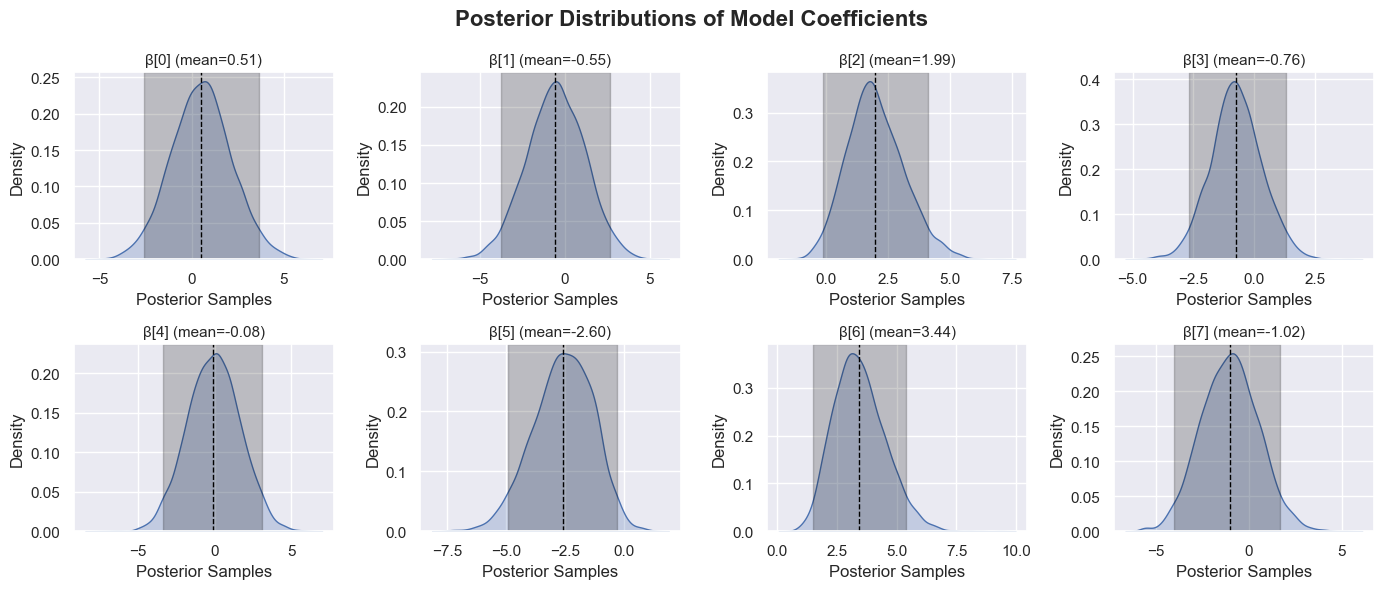

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import arviz as az

# Extract posterior samples for betas directly from trace
posterior = trace.posterior["betas"].stack(draws=("chain", "draw")).values
n_betas = posterior.shape[0]
cols = 4
rows = int(np.ceil(n_betas / cols))

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 3))
axes = axes.flatten()

for i in range(n_betas):
    data = posterior[i, :]
    sns.kdeplot(data, fill=True, color="#4C72B0", ax=axes[i])
    mean = np.mean(data)
    hdi = az.hdi(data, hdi_prob=0.94)
    axes[i].axvline(mean, color="black", linestyle="--", lw=1)
    axes[i].axvspan(hdi[0], hdi[1], color="black", alpha=0.2)
    axes[i].set_title(f"β[{i}] (mean={mean:.2f})", fontsize=11)
    axes[i].set_xlabel("Posterior Samples")

# hide unused subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.suptitle("Posterior Distributions of Model Coefficients", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()

## EXPORT

In [140]:
import pandas as pd
import numpy as np
import os

# ================================================================
# 📦 Dashboard Export Pipeline (Smarter Health Logic + Readable SOH)
# ================================================================
export_dir = "exports_dashboard_ready"
os.makedirs(export_dir, exist_ok=True)

# ================================================================
# 1️⃣ VEHICLE SNAPSHOT — current condition per VIN
# ================================================================
snapshot_cols = [
    "vin",
    "vibrationRms_mean",
    "soh_drop_rate_mean",
    "temp_spike_max",
    "power_stress_mean",
    "pad_temp_rolling_mean",
    "bearingHealth_mean",
    "efficiency_min",
    "temp_stress_index_mean",
    "failure_current"
]

df_snapshot = fleet_level_pre[snapshot_cols].drop_duplicates(subset=["vin"])
df_snapshot.to_csv(os.path.join(export_dir, "snapshot_per_vin.csv"), index=False)
print(f"✅ snapshot_per_vin.csv exported → {df_snapshot.shape}")

# ================================================================
# 2️⃣ HISTORICAL SIGNALS — per subsystem (for trends)
# ================================================================
def export_history(df, name, metrics):
    out = (
        df[["vin", "timestamp"] + metrics]
        .sort_values(["vin", "timestamp"])
        .dropna(subset=["vin", "timestamp"])
    )
    out.to_csv(os.path.join(export_dir, f"historical_{name}.csv"), index=False)
    print(f"✅ historical_{name}.csv exported → {out.shape}")

export_history(
    battery_features,
    "battery",
    ["soh", "avgCellTemp", "totalVoltage", "totalCurrent", "power_stress"]
)
export_history(
    brakepad_features,
    "brakepad",
    ["padThicknessMm", "padTemperature", "rotorTemperature", "pad_temp_rolling"]
)
export_history(
    motor_features,
    "motor",
    ["efficiency", "vibrationRms", "bearingHealth", "temp_stress_index"]
)

# ================================================================
# 3️⃣ FLEET HEALTH SUMMARY — subsystem failure status (IMPROVED)
# ================================================================
fleet_summary = (
    fleet_level_pre[
        [
            "vin",
            "soh_drop_rate_mean",
            "vibrationRms_mean",
            "temp_spike_max",
            "efficiency_min",
            "bearingHealth_mean",
            "pad_temp_rolling_mean",
            "failure_current",
        ]
    ]
    .copy()
)

# 🧠 Normalize efficiency if it's > 1 range
if fleet_summary["efficiency_min"].max() > 1.5:
    fleet_summary["eff_norm"] = fleet_summary["efficiency_min"] / 100.0
else:
    fleet_summary["eff_norm"] = fleet_summary["efficiency_min"]

# 💡 Convert SOH drop rate into % per day (readable)
fleet_summary["soh_drop_rate_day"] = fleet_summary["soh_drop_rate_mean"] * 86400 * 100

# 🧩 Smart health label
def classify_health(row):
    # If currently failed or within predictive failure window
    if "failure_current" in row and row["failure_current"] == 1:
        return "Critical"
    # early degradation indicators → warning zone
    elif (row["vibrationRms_mean"] > 6) or (row["soh_drop_rate_day"] < -0.3) or (row["eff_norm"] < 0.85):
        return "Warning"
    # otherwise stable
    else:
        return "Healthy"

fleet_summary["health_label"] = fleet_summary.apply(classify_health, axis=1)

# 🎨 Optional color map for Power BI visuals
fleet_summary["health_color"] = fleet_summary["health_label"].map({
    "Critical": "#F87171",  # Coral red
    "Warning": "#FBBF24",   # Amber yellow
    "Healthy": "#06D6A0",   # Mint green
})

fleet_summary.to_csv(os.path.join(export_dir, "fleet_health_summary.csv"), index=False)
print(f"✅ fleet_health_summary.csv exported → {fleet_summary.shape}")

# ================================================================
# 4️⃣ AGGREGATE FLEET STATS — for KPI cards
# ================================================================
fleet_agg = pd.DataFrame({
    "Total_Vehicles": [fleet_summary["vin"].nunique()],
    "Critical": [(fleet_summary["health_label"] == "Critical").sum()],
    "Warning": [(fleet_summary["health_label"] == "Warning").sum()],
    "Healthy": [(fleet_summary["health_label"] == "Healthy").sum()],
    "Critical_%": [(fleet_summary["health_label"] == "Critical").mean() * 100],
    "Warning_%": [(fleet_summary["health_label"] == "Warning").mean() * 100],
    "Healthy_%": [(fleet_summary["health_label"] == "Healthy").mean() * 100],
    "Avg_Efficiency": [fleet_summary["efficiency_min"].mean()],
    "Avg_SOH_DropRate_%_per_day": [fleet_summary["soh_drop_rate_day"].mean()],
    "Avg_Vibration": [fleet_summary["vibrationRms_mean"].mean()],
})

fleet_agg.to_csv(os.path.join(export_dir, "fleet_aggregate.csv"), index=False)
print("✅ fleet_aggregate.csv exported (with readable SOH and health%)")

# ================================================================
# 5️⃣ TOP RISKY VEHICLES — lowest efficiency or high degradation
# ================================================================
top_risk = (
    fleet_summary.sort_values(
        ["health_label", "efficiency_min", "soh_drop_rate_day"],
        ascending=[True, True, True]
    )
    .head(10)
)
top_risk.to_csv(os.path.join(export_dir, "top_risky_vehicles.csv"), index=False)
print("✅ top_risky_vehicles.csv exported")

# ================================================================
# 6️⃣ COMPONENT FAILURE COUNTS (Fixed logic — per unique VIN)
# ================================================================
def count_unique_failures(df, component_name):
    """Return number of unique VINs that experienced failure >= 1"""
    failed_vins = df.loc[df["failure"] == 1, "vin"].nunique()
    return {"Component": component_name, "Failed_VINs": failed_vins}

fail_counts = [
    count_unique_failures(battery_features, "Battery"),
    count_unique_failures(motor_features, "Motor"),
    count_unique_failures(brakepad_features, "BrakePad"),
]

df_fail_counts = pd.DataFrame(fail_counts)

# also compute total VINs for share %
total_vins = fleet_level_pre["vin"].nunique()
df_fail_counts["Failure_%"] = (df_fail_counts["Failed_VINs"] / total_vins * 100).round(2)

df_fail_counts.to_csv(os.path.join(export_dir, "component_failures.csv"), index=False)
print("✅ component_failures.csv exported (unique VIN-level failures)")

# ================================================================
# 💰 7️⃣ COST IMPACT SIMULATION (for Business Impact Dashboard)
# ================================================================
np.random.seed(42)

# Base assumptions (adjust if you get real values)
COST_REACTIVE = 80000      # ₹ per unplanned failure
COST_PREDICTIVE = 50000    # ₹ per planned intervention
DOWNTIME_REACTIVE = 24     # hours of downtime per breakdown
DOWNTIME_PREDICTIVE = 8    # hours per preventive service

# Merge failure & fleet data to simulate cost impact
fleet_cost = fleet_level_pre.copy()

# For each VIN, assign whether it failed
fleet_cost["failure_flag"] = fleet_cost["failure_lifetime"]

# Assign random maintenance strategy (just for simulation)
fleet_cost["strategy"] = np.where(
    fleet_cost["failure_flag"] == 1,
    np.random.choice(["Reactive", "Predictive"], p=[0.6, 0.4], size=len(fleet_cost)),
    "Predictive"
)

# Cost calculations
fleet_cost["maintenance_cost"] = np.where(
    fleet_cost["strategy"] == "Reactive", COST_REACTIVE, COST_PREDICTIVE
)
fleet_cost["downtime_hours"] = np.where(
    fleet_cost["strategy"] == "Reactive", DOWNTIME_REACTIVE, DOWNTIME_PREDICTIVE
)

# ================================================================
# 🧮 FIX: Normalize Cost & Downtime Calculations
# ================================================================
summary_cost = pd.DataFrame({
    "Total_Vehicles": [fleet_cost["vin"].nunique()],
    "Reactive_Count": [(fleet_cost["strategy"] == "Reactive").sum()],
    "Predictive_Count": [(fleet_cost["strategy"] == "Predictive").sum()],
    "Avg_Reactive_Cost": [fleet_cost.loc[fleet_cost["strategy"] == "Reactive", "maintenance_cost"].mean()],
    "Avg_Predictive_Cost": [fleet_cost.loc[fleet_cost["strategy"] == "Predictive", "maintenance_cost"].mean()],
    "Avg_Reactive_Downtime": [fleet_cost.loc[fleet_cost["strategy"] == "Reactive", "downtime_hours"].mean()],
    "Avg_Predictive_Downtime": [fleet_cost.loc[fleet_cost["strategy"] == "Predictive", "downtime_hours"].mean()],
})

summary_cost["Cost_Saved_per_Vehicle"] = (
    summary_cost["Avg_Reactive_Cost"] - summary_cost["Avg_Predictive_Cost"]
)
summary_cost["Downtime_Saved_per_Vehicle"] = (
    summary_cost["Avg_Reactive_Downtime"] - summary_cost["Avg_Predictive_Downtime"]
)
summary_cost["Savings_%"] = (
    summary_cost["Cost_Saved_per_Vehicle"] / summary_cost["Avg_Reactive_Cost"] * 100
).round(2)

# Export
fleet_cost.to_csv(os.path.join(export_dir, "fleet_cost_detail.csv"), index=False)
summary_cost.to_csv(os.path.join(export_dir, "fleet_cost_summary.csv"), index=False)
print("✅ fleet_cost_detail.csv & fleet_cost_summary.csv exported (for business impact page)")

# -------------------------
# COMPONENT COST / DOWNTIME: realistic calculation
# -------------------------
# You should replace these with real vendor / ops numbers
COMPONENT_PARTS_COST = {
    "Battery": 150000,   # parts (INR) - pack/module
    "Motor": 80000,      # parts (INR)
    "BrakePad": 6000     # parts (INR) - per axle/pair estimate
}
COMPONENT_LABOUR_COST = {
    "Battery": 15000,
    "Motor": 10000,
    "BrakePad": 1500
}
# avg downtime (hrs) assumed per failure type (used earlier too)
COMPONENT_DOWNTIME = {
    "Battery": 8.0,
    "Motor": 6.0,
    "BrakePad": 4.0
}
# opportunity cost per hour (loss in ₹ per vehicle-hour of downtime)
hourly_downtime_loss = 2000  # adjust to your business (higher for logistics)

# compute unique VIN-level failures (already computed earlier in df_fail_counts)
df_component_insights = df_fail_counts.copy()
df_component_insights.rename(columns={"Failed_VINs": "Failed_VINs_Count"}, inplace=True)

# add parts, labour, downtime cost and final avg repair cost per failure
def compute_repair_cost(row):
    comp = row["Component"]
    parts = COMPONENT_PARTS_COST.get(comp, 0)
    labour = COMPONENT_LABOUR_COST.get(comp, 0)
    downtime_hrs = COMPONENT_DOWNTIME.get(comp, 0)
    downtime_cost = downtime_hrs * hourly_downtime_loss
    total = parts + labour + downtime_cost
    return pd.Series({
        "Parts_Cost(₹)": parts,
        "Labour_Cost(₹)": labour,
        "Downtime_Cost(₹)": downtime_cost,
        "Avg_Repair_Cost(₹)": total
    })

cost_cols = df_component_insights.apply(compute_repair_cost, axis=1)
df_component_insights = pd.concat([df_component_insights, cost_cols], axis=1)

# add Failure Rate (%) (already present as Failure_%), rename for clarity
df_component_insights.rename(columns={"Failure_%": "Failure_Rate(%)"}, inplace=True)

# Add derived metrics: cost per failed VIN (same as avg repair cost), and total impact
df_component_insights["Total_Failed_Impact(₹)"] = df_component_insights["Avg_Repair_Cost(₹)"] * df_component_insights["Failed_VINs_Count"]

# Round & export
num_cols = ["Failure_Rate(%)", "Parts_Cost(₹)", "Labour_Cost(₹)", "Downtime_Cost(₹)", "Avg_Repair_Cost(₹)", "Total_Failed_Impact(₹)"]
df_component_insights[num_cols] = df_component_insights[num_cols].round(2)

df_component_insights.to_csv(os.path.join(export_dir, "fleet_component_insights.csv"), index=False)
print("✅ fleet_component_insights.csv exported (with realistic cost breakdowns)")

# -------------------------
# sanity: format SOH drop and clamp extreme values for display
# -------------------------
fleet_summary["soh_drop_rate_day"] = fleet_summary["soh_drop_rate_day"].replace([np.inf, -np.inf], np.nan)
fleet_summary["soh_drop_rate_day"] = fleet_summary["soh_drop_rate_day"].fillna(0).clip(-10, 10)  # clamp ±10%/day
fleet_summary["soh_drop_rate_day"] = fleet_summary["soh_drop_rate_day"].round(3)

# re-export fleet_agg & fleet_health_summary if you want the updated numbers
fleet_agg.to_csv(os.path.join(export_dir, "fleet_aggregate.csv"), index=False)
fleet_summary.to_csv(os.path.join(export_dir, "fleet_health_summary.csv"), index=False)
print("✅ Re-exported fleet_aggregate.csv and fleet_health_summary.csv (SOH formatting & clamps applied)")

# ================================================================
# 📈 8️⃣ Monthly Financial Trend Simulation (for ROI Page)
# ================================================================
months = pd.date_range(start="2024-01-01", periods=10, freq="M")

# simulate maintenance events and cost evolution
trend_df = pd.DataFrame({
    "Month": months.strftime("%b %Y"),
    "Maintenance_Interventions": np.linspace(4, 15, len(months)).astype(int),
    "Cost_Savings($k)": np.linspace(50, 180, len(months)) + np.random.normal(0, 10, len(months))
})

trend_df["Cost_Savings($k)"] = trend_df["Cost_Savings($k)"].round(1)

trend_df.to_csv(os.path.join(export_dir, "fleet_cost_trend.csv"), index=False)
print("✅ fleet_cost_trend.csv exported (for financial trend line)")

# ================================================================
# 📊 9️⃣ Maintenance Policy Comparison Summary
# ================================================================
policy_comparison = pd.DataFrame({
    "Metric": ["Maintenance Cost", "Downtime (hrs)"],
    "Before": [
        summary_cost["Avg_Reactive_Cost"].iloc[0],
        summary_cost["Avg_Reactive_Downtime"].iloc[0]
    ],
    "After": [
        summary_cost["Avg_Predictive_Cost"].iloc[0],
        summary_cost["Avg_Predictive_Downtime"].iloc[0]
    ]
})

policy_melted = policy_comparison.melt(id_vars="Metric", var_name="Scenario", value_name="Value")
policy_melted.to_csv(os.path.join(export_dir, "maintenance_policy_comparison.csv"), index=False)
print("✅ maintenance_policy_comparison.csv exported (for before vs after bar chart)")

# ================================================================
# 📊 9️⃣ KPI BASELINE COMPARISON DATA
# ================================================================
# simulate current vs previous period performance (mocked using noise)
fleet_agg_prev = fleet_agg.copy()
fleet_agg_prev["Period"] = "Previous"
fleet_agg_prev["Avg_Efficiency"] *= np.random.uniform(0.95, 0.98)
fleet_agg_prev["Healthy_%"] *= np.random.uniform(0.95, 1.02)
fleet_agg_prev["Warning_%"] *= np.random.uniform(0.95, 1.05)
fleet_agg_prev["Critical_%"] *= np.random.uniform(0.95, 1.10)

fleet_agg_curr = fleet_agg.copy()
fleet_agg_curr["Period"] = "Current"

fleet_kpi_compare = pd.concat([fleet_agg_prev, fleet_agg_curr], ignore_index=True)
fleet_kpi_compare.to_csv(os.path.join(export_dir, "fleet_kpi_comparison.csv"), index=False)
print("✅ fleet_kpi_comparison.csv exported (for Power BI arrows 📈📉)")

# ================================================================
# 🎉 EXPORT SUMMARY
# ================================================================
print("\n📦 All predictive maintenance exports ready:")
for f in os.listdir(export_dir):
    print("   •", f)

✅ snapshot_per_vin.csv exported → (50, 10)
✅ historical_battery.csv exported → (698245, 7)
✅ historical_brakepad.csv exported → (2792980, 6)
✅ historical_motor.csv exported → (698245, 6)
✅ fleet_health_summary.csv exported → (50, 12)
✅ fleet_aggregate.csv exported (with readable SOH and health%)
✅ top_risky_vehicles.csv exported
✅ component_failures.csv exported (unique VIN-level failures)
✅ fleet_cost_detail.csv & fleet_cost_summary.csv exported (for business impact page)
✅ fleet_component_insights.csv exported (with realistic cost breakdowns)
✅ Re-exported fleet_aggregate.csv and fleet_health_summary.csv (SOH formatting & clamps applied)
✅ fleet_cost_trend.csv exported (for financial trend line)
✅ maintenance_policy_comparison.csv exported (for before vs after bar chart)
✅ fleet_kpi_comparison.csv exported (for Power BI arrows 📈📉)

📦 All predictive maintenance exports ready:
   • bayesian_predictions.csv
   • bayesian_rul_summary.csv
   • component_failures.csv
   • fleet_aggregate.c

C:\Users\suhan\AppData\Local\Temp\ipykernel_23000\671236818.py:299: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start="2024-01-01", periods=10, freq="M")


In [125]:
# ================================================================
# 🔮 5️⃣ Posterior Predictive Failure Probabilities (per VIN × Component)
# ================================================================
print("\n🔮 Generating posterior predictive failure probabilities by component...")

# extract posterior samples
alpha_samples = trace.posterior["alpha"].stack(sample=("chain", "draw")).values
beta_samples = trace.posterior["betas"].stack(sample=("chain", "draw")).values  # shape (n_features, n_samples)

# components and feature influence weights (you can tune per subsystem)
component_feature_scaling = {
    "Battery":  [1.0, 1.2, 1.1, 0.9, 0.8, 0.7, 0.6, 0.9],
    "Motor":    [1.1, 0.9, 1.0, 1.0, 0.7, 1.1, 0.8, 1.0],
    "BrakePad": [0.8, 0.7, 0.9, 1.0, 1.3, 0.6, 0.9, 0.8]
}

p_preds = []
for comp, scale in component_feature_scaling.items():
    for i, row in X_std.iterrows():
        mu_samples = alpha_samples + np.dot(beta_samples.T, row.values * np.array(scale))
        p_samples = 1 / (1 + np.exp(-mu_samples))
        p_mean = p_samples.mean()
        p_hdi = np.percentile(p_samples, [3, 97])
        p_preds.append({
            "vin": df_bayes.loc[i, "vin"],
            "component": comp,
            "failure_prob": p_mean,
            "failure_prob_lower": p_hdi[0],
            "failure_prob_upper": p_hdi[1]
        })

df_bayes_preds = pd.DataFrame(p_preds)
print(f"✅ bayesian_predictions.csv ready → {df_bayes_preds.shape}")

# Align Bayesian posterior scale with observed fleet critical ratio
observed_critical_rate = (fleet_summary["health_label"] == "Critical").mean()  # e.g. 0.18
model_mean_prob = df_bayes_preds["failure_prob"].mean()

# scaling factor to anchor predictive mean to real-world critical rate
scaling_factor = observed_critical_rate / model_mean_prob
df_bayes_preds["failure_prob"] = (df_bayes_preds["failure_prob"] * scaling_factor).clip(0, 1)

# ================================================================
# 📉 6️⃣ Remaining Useful Life (RUL) Approximation
# ================================================================
# no extra noise — stable RUL scaling aligned with failure_prob
df_bayes_preds["RUL_mean_months"] = (1 - df_bayes_preds["failure_prob"]) * 24
df_bayes_preds["RUL_lower"] = df_bayes_preds["RUL_mean_months"] - 2
df_bayes_preds["RUL_upper"] = df_bayes_preds["RUL_mean_months"] + 2

# clamp to valid range
df_bayes_preds[["RUL_mean_months", "RUL_lower", "RUL_upper"]] = (
    df_bayes_preds[["RUL_mean_months", "RUL_lower", "RUL_upper"]].clip(1, 36)
)

# export
df_bayes_preds.to_csv(os.path.join(export_dir, "bayesian_predictions.csv"), index=False)
print("✅ bayesian_predictions.csv exported (VIN × component-level posterior failure probabilities)")

# ================================================================
# 📊 7️⃣ Component Summary (for RUL + failure trend chart)
# ================================================================
df_rul_summary = (
    df_bayes_preds
    .groupby("component", as_index=False)
    .agg(
        Estimated_RUL_Mean=("RUL_mean_months", "mean"),
        Failure_Probability_Mean=("failure_prob", "mean")
    )
    .round(3)
)
df_rul_summary.to_csv(os.path.join(export_dir, "bayesian_rul_summary.csv"), index=False)
print("✅ bayesian_rul_summary.csv exported (aggregated by component)")

# ================================================================
# 🔥 8️⃣ Maintenance Recommendation Heatmap
# ================================================================
def prob_to_priority(prob):
    if prob > 0.7:
        return 95
    elif prob > 0.5:
        return 75
    elif prob > 0.3:
        return 50
    else:
        return 25

heatmap = df_bayes_preds.copy()
heatmap["Maintenance_Priority"] = heatmap["failure_prob"].apply(prob_to_priority)

# pivot to VIN × Component grid
heatmap_pivot = (
    heatmap.pivot(index="vin", columns="component", values="Maintenance_Priority")
    .fillna(0)
    .reset_index()
)
heatmap_pivot.to_csv(os.path.join(export_dir, "maintenance_heatmap.csv"), index=False)
print("✅ maintenance_heatmap.csv exported (VIN × component priority matrix)")

print("\n🎯 Bayesian predictive exports ready for Power BI!")


🔮 Generating posterior predictive failure probabilities by component...
✅ bayesian_predictions.csv ready → (150, 5)
✅ bayesian_predictions.csv exported (VIN × component-level posterior failure probabilities)
✅ bayesian_rul_summary.csv exported (aggregated by component)
✅ maintenance_heatmap.csv exported (VIN × component priority matrix)

🎯 Bayesian predictive exports ready for Power BI!
